In [2]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode(connected = True)




# This requires the basemap package, but I can see if there is a way to have other dependencies
# https://anaconda.org/anaconda/basemap

In [26]:
def plotDeterminant3D2(A):
    # See; https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    
    # Will only execute if it is 3x3
    if (np.shape(A) != (3,3)):
        print('Le matrice A doit être 3x3.')
        return
    
    # Define vertices for a cube to multiply with input matrix A to get parallelopiped
    cube = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])
    vertices = np.zeros((8,3))
    for i in range(8):
        vertices[i,:] = np.dot(cube[i,:], A)
    
    
    # Create figure / grid to plot
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection = '3d')
    
    r = [-1,1]
    X, Y = np.meshgrid(r,r)
    
    # Plot vertices
    ax.scatter3D(vertices[:,0], vertices[:,1], vertices[:,2])
    
    # List of sides
    sides = [[vertices[0], vertices[1], vertices[2], vertices[3]],
             [vertices[4], vertices[5], vertices[6], vertices[7]],
             [vertices[0], vertices[1], vertices[5], vertices[4]],
             [vertices[2], vertices[3], vertices[7], vertices[6]],
             [vertices[1], vertices[2], vertices[6], vertices[5]],
             [vertices[4], vertices[7], vertices[3], vertices[0]]]
    
    # Plot sides
    ax.add_collection3d(Poly3DCollection(sides, facecolors='cyan', linewidths =1, edgecolors = 'black', alpha=.25))
    plt.rcParams['interactive']
    plt.show
    
    
    vol = np.abs(np.linalg.det(A))
    vol = np.round(vol, decimals = 3) 
    print('Le volume est:', vol)
    

Le volume est: 332.32


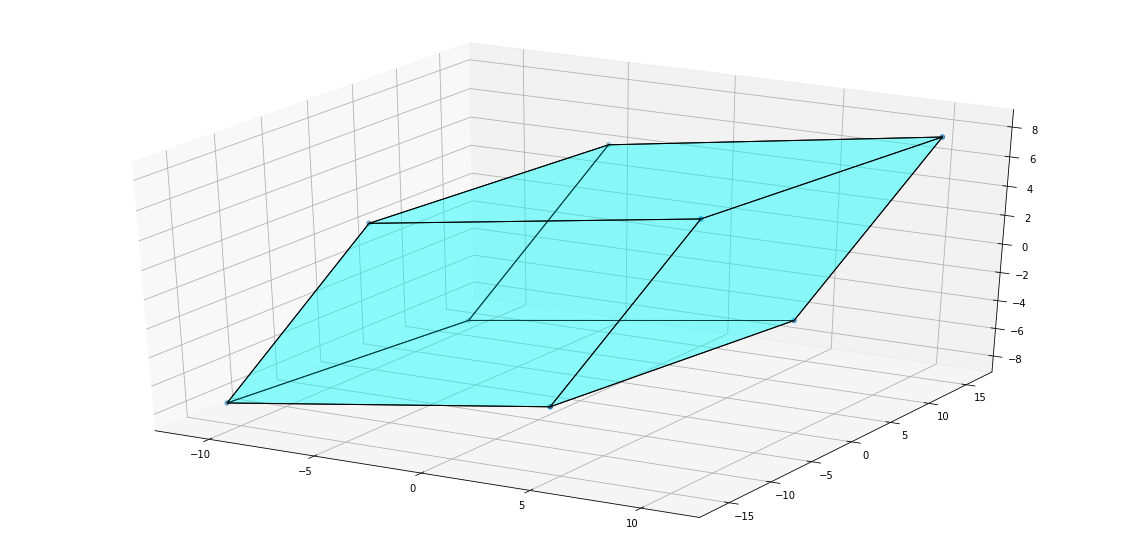

In [27]:
A = [[2, 9.14, 1],
    [8, -1, 2],
    [1, 6, 5]]

plotDeterminant3D(A)

In [32]:
def plotDeterminant3D(A):
    # Will only execute if it is 3x3
    if (np.shape(A) != (3,3)):
        print('Le matrice A doit être 3x3.')
        return
    
    # This creates the parallelopiped coordonates
    cube = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])
    vertices = np.zeros((8,3))
    for i in range(8):
        vertices[i,:] = np.dot(cube[i,:], A)
    
    data_x = vertices[:,0]
    data_y = vertices[:,1]
    data_z = vertices[:,2]
    #blim = np.min(np.minimum(data_x, data_y, data_z)) 
    
    vol = np.abs(np.linalg.det(A))
    vol = np.round(vol, decimals = 3) 
    plot3d(data_x, data_y, data_z, vol) 
    
    
    
def plot3d(data_x, data_y, data_z, vol):  
  
    fig = go.Figure(
    data = [
        go.Mesh3d(
            x = data_x,
            y = data_y,
            z = data_z,
            i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2], # These are needed, numbers from documentation
            j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
            k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
            colorscale=[[0, 'darkblue'],
                    [0.5, 'lightskyblue'],
                    [1, 'darkblue']],
            intensity = np.linspace(0, 1, 8, endpoint=True),
            showscale=False,
            opacity = 0.6
        )
    ],
    layout = go.Layout(
        title = "Le volume est: " + str(vol),
        autosize = True
        )
    )

    # This prints it
    pyo.iplot(fig, filename='some-data-surface')


In [33]:
A = [[-3, 1, 5],
    [2, -1, 3],
    [1, -5, -1]]

plotDeterminant3D(A)

In [211]:
def plotDeterminant2D(A):
    # See; https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    
    # Will only execute if it is 2x2
    if (np.shape(A) != (2,2)):
        print('Le matrice A doit être 2x2.')
        return
    
    # Define vertices for a cube to multiply with input matrix A to get parallelopiped
    rect = np.array([[1, -1],
                     [1, 1],
                     [-1, 1],
                     [-1, -1]])
    
    vertices = np.zeros((5,2))
    
    for i in range(4): vertices[i,:] = np.dot(rect[i,:], A)
    vertices[4,0] = vertices[0,0]
    vertices[4,1] = vertices[0,1]
    
    
    # Create figure / grid to plot
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    

    
    # Plot vertices
    ax.plot(vertices[:,0], vertices[:,1])
    
   
    # Plot sides
    #ax.add_collection3d(Poly3DCollection(sides, facecolors='cyan', linewidths =1, edgecolors = 'black', alpha=.25))
    #plt.grid()
    #plt.show
    
    vol = np.abs(np.linalg.det(A)) # absolute value of the determinant
    vol = np.round(vol, decimals = 3)
    print("L'aire est:", vol)
    
    
    
    #fig, ax = plt.subplots()
    coll = PolyCollection([vertices])
    ax.add_collection(coll)
    ax.autoscale_view()
    plt.grid()
    plt.show()

L'aire est: 12.943


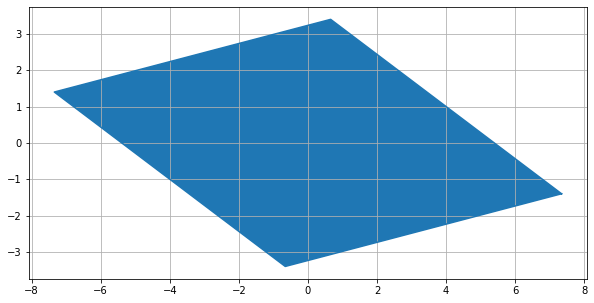

In [212]:
A = [[4,1], [-3.343,2.4]]

plotDeterminant2D(A)